In [1]:
%pylab inline
import matplotlib as mpl
mpl.rc('savefig',dpi = 150)
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation


class wave2d(object):
    def __init__(self,height,width,T,nx,ny,nt,c):      
        self.x = np.linspace(-0.5*width,0.5*width,nx)
        self.y = np.linspace(-0.5*height,0.5*height,ny)
        self.t = np.linspace(0,T,nt+1)
        self.dx = self.x[1]-self.x[0]
        self.dy = self.y[1]-self.y[0]
        self.dt = self.t[1]-self.t[0]      
        self.xx,self.yy = np.meshgrid(self.x,self.y)
        # Gamma_x squared
        self.gx2 = c*self.dt/self.dx
        # Gamma_y squared
        self.gy2 = c*self.dt/self.dy
        # 2*(1-gamma_x^2-gamma_y^2)
        self.gamma = 2*(1 - self.gx2 - self.gy2)
        
    def solve(self,ffun,gfun):
        f = ffun(self.xx,self.yy)
        g = gfun(self.xx,self.yy) 
        u = np.zeros((ny,nx,nt+1))
        # Set initial condition
        u[:,:,0] = f
        """ Compute first time step """
        u[:,:,1] = 0.5*self.gamma*f+self.dt*g
        u[1:-1,1:-1,1] += 0.5*self.gx2*(f[1:-1,2:]+f[1:-1,:-2])
        u[1:-1,1:-1,1] += 0.5*self.gy2*(f[:-2,1:-1]+f[2:,1:-1])
        for k in range(1,nt):
            # Every point contains these terms
            u[:,:,k+1] = self.gamma*u[:,:,k] - u[:,:,k-1]
            # Interior points
            u[1:-1,1:-1,k+1] += self.gx2*(u[1:-1,2:,k]+u[1:-1,:-2,k]) + \
                                self.gy2*(u[2:,1:-1,k]+u[:-2,1:-1,k]) 
            # Top boundary
            u[0,1:-1,k+1] +=  2*self.gy2*u[1,1:-1,k] + \
                                self.gx2*(u[0,2:,k]+u[0,:-2,k])                    
            # Right boundary
            u[1:-1,-1,k+1] += 2*self.gx2*u[1:-1,-2,k] + \
                                self.gy2*(u[2:,-1,k]+u[:-2,-1,k])
            # Bottom boundary
            u[-1,1:-1,k+1] +=  2*self.gy2*u[-2,1:-1,k] + \
                                 self.gx2*(u[-1,2:,k]+u[-1,:-2,k])                       
            # Left boundary
            u[1:-1,0,k+1] += 2*self.gx2*u[1:-1,1,k] + \
                               self.gy2*(u[2:,0,k]+u[:-2,0,k])
            # Top right corner
            u[0,-1,k+1] += 2*self.gx2*u[0,-2,k] + \
                           2*self.gy2*u[1,-1,k]
            # Bottom right corner
            u[-1,-1,k+1] += 2*self.gx2*u[-1,-2,k] + \
                            2*self.gy2*u[-2,-1,k]
            # Bottom left corner
            u[-1,0,k+1] += 2*self.gx2*u[-1,1,k] + \
                           2*self.gy2*u[-2,0,k]    
            # Top left corner
            u[0,0,k+1] += 2*self.gx2*u[0,1,k] + \
                          2*self.gy2*u[1,0,k]    
        return u         

In [3]:
# Final time
T = 6
# Domain dimensions
height = 4
width = 4
# Wave speed
c = 1
# Number of time steps
nt = 1400
# Grid points in x direction
nx = 300
# Grid points in y direction
ny = 300
wave_eq = wave2d(height,width,T,nx,ny,nt,c)
# Initial value functions
f = lambda x,y: np.exp(-10*(x**2+y**2))
g = lambda x,y: 0
# Solve
u = wave_eq.solve(f,g)
x = wave_eq.x
y = wave_eq.y

In [4]:
from mpl_toolkits.mplot3d import Axes3D

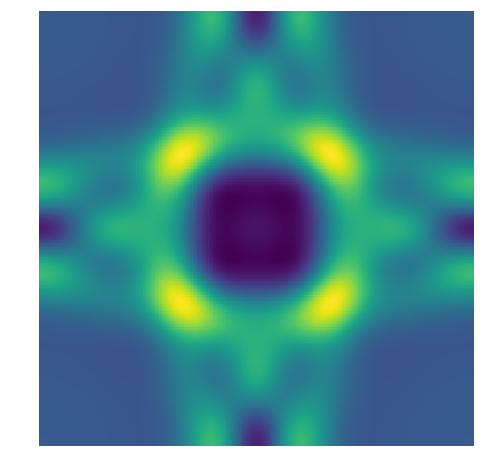

In [5]:
fig = plt.figure(1,(8,8))
#for k in range(nt+1):
k = 620
plt.imshow(u[:,:,k],extent=[x[0],x[-1],y[0],y[-1]])
plt.axis('off')
plt.gca().set_xlim(-2,2)
plt.gca().set_ylim(-2,2)
pth = os.path.join(os.path.expanduser('~'),'Desktop')
#plt.savefig(os.path.join(pth,'wave2.png'),dpi = 300, bbox_inches = 'tight')

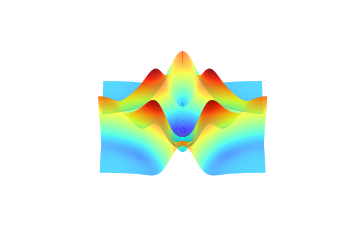

In [9]:
# Put this in a loop to save all time frames to make a video visualisation from individual images.
X = np.linspace(0,1,nx)
Y = np.linspace(0,1,nx)
X, Y = np.meshgrid(X, Y)
ax = plt.gca(projection='3d')
plt.axis('off')
k = 600
ax.plot_surface(X, Y, u[:,:,k], rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=True)
ax.view_init(elev=60., azim=0)
plt.savefig(os.path.join(pth,'wave22.png'),dpi = 300, bbox_inches = 'tight')

# [Video of the solution](https://youtu.be/_aOYe9hcV10)